In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

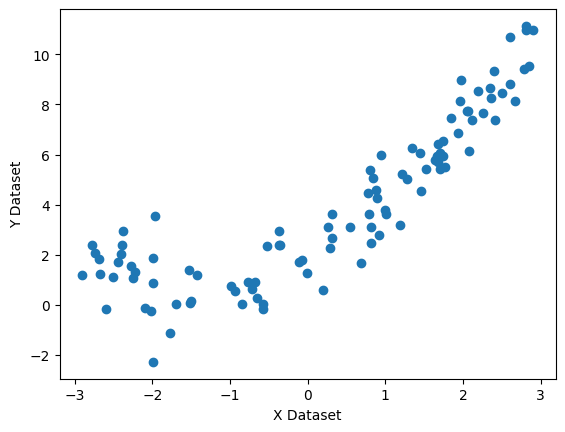

In [34]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
#Quadratic eqution used - y = 0.5X^2 + 1.5X+2+outliers
plt.scatter(X, y)
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [37]:
regression_1.fit(X_train, y_train)
y_predict = regression_1.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print(score)

0.6969703417665771


Visualization

Text(0, 0.5, 'Y Predict')

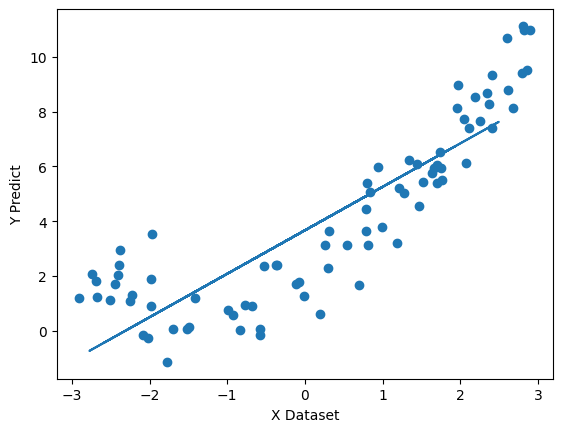

In [39]:
plt.plot(X_test, y_predict)
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y Predict')


We can see we have a lot of error

In [40]:
 #We apply Poynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

fit_transform(X_train):

    Learns how many combinations (features) to generate based on degree=2

    Applies the transformation to X_train

transform(X_test):

    Uses the same learned structure to transform X_test

    Does NOT re-fit on X_test, which is correct (to prevent data leakage)

In [61]:
poly=PolynomialFeatures(degree=3, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [62]:
##We apply regression again
regression = LinearRegression()

In [63]:
regression.fit(X_train_poly, y_train)
predict = regression.predict(X_test_poly)
score = r2_score(y_test, predict)
print(score)

0.8612848878470747


In [64]:
print(regression.coef_)

[[ 0.          1.77891772  0.52635489 -0.04577211]]


In [65]:
print(regression.intercept_)

[1.95613168]


Text(0, 0.5, 'Y Predict')

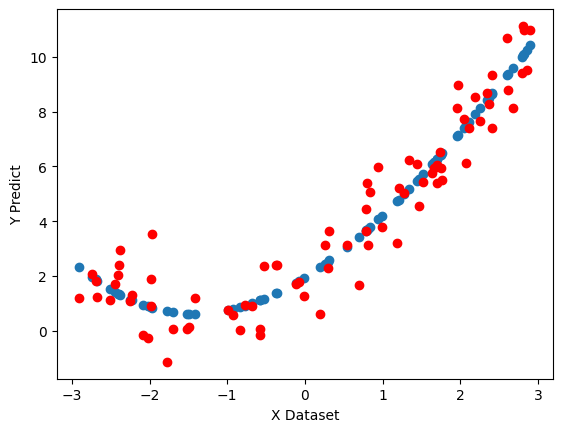

In [68]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train, color='r')
plt.xlabel('X Dataset')
plt.ylabel('Y Predict')

##Pipeline Concepts

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias = True)
    lin_reg = LinearRegression() 
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new, 'r', label="Degree"+str(degree), linewidth = 3)
    plt.plot(X_train, y_train, "b.", linewidth = 3)
    plt.plot(X_test, y_test, "g.", linewidth = 3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

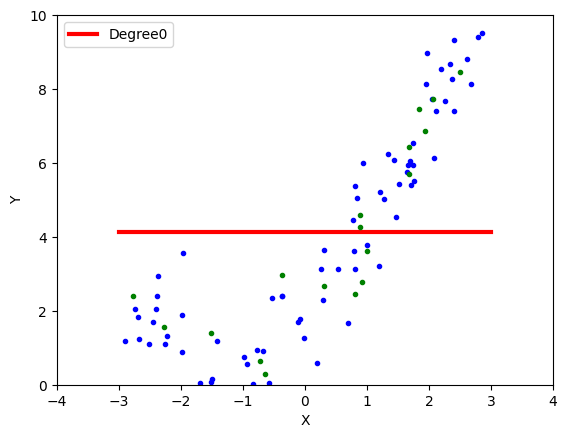

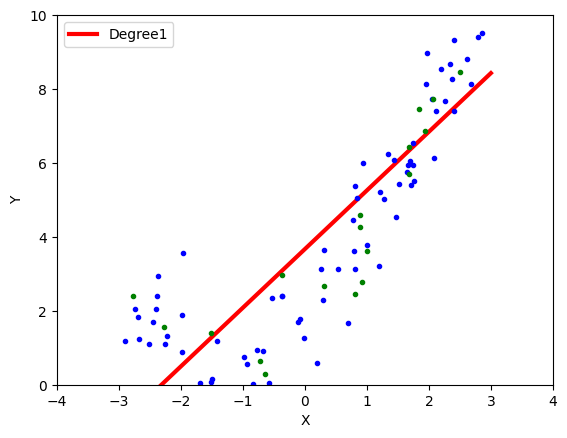

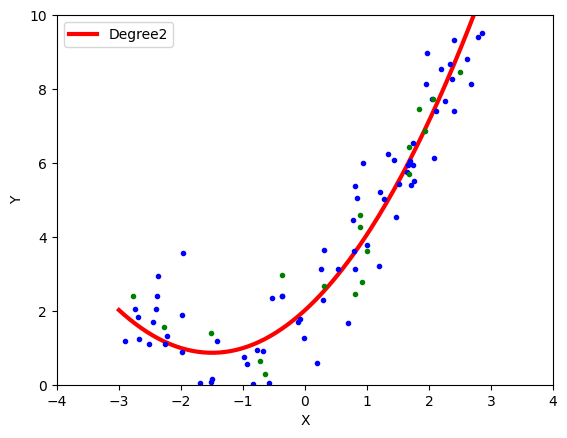

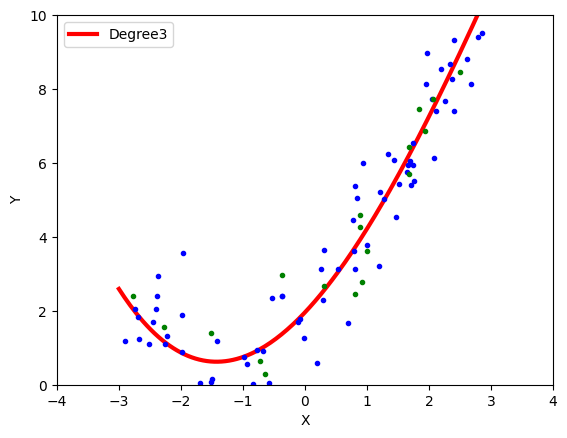

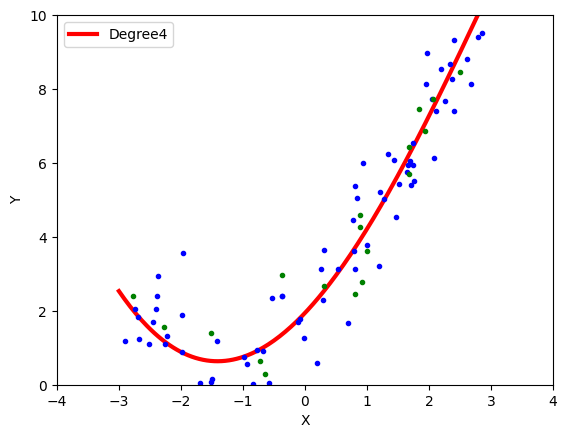

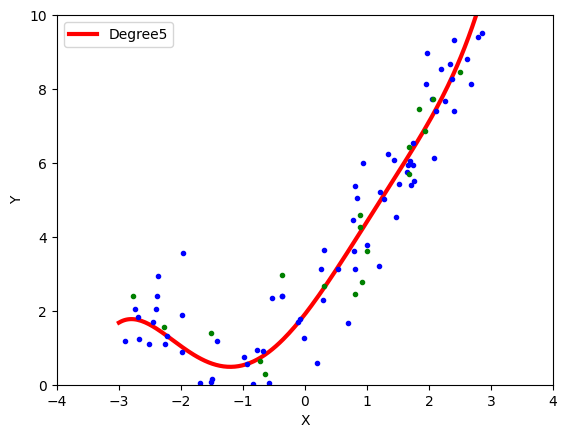

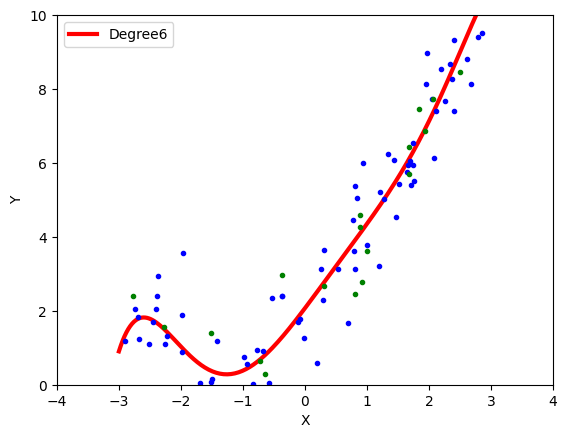

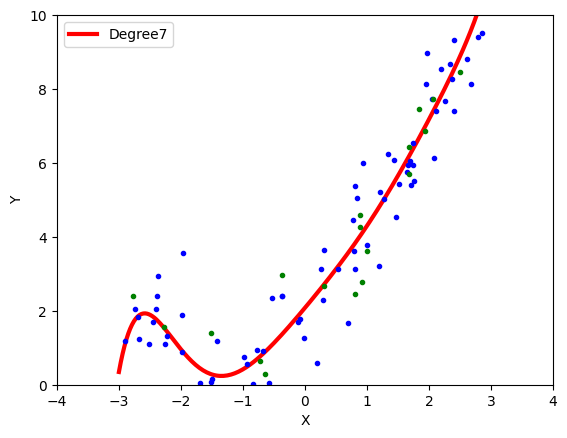

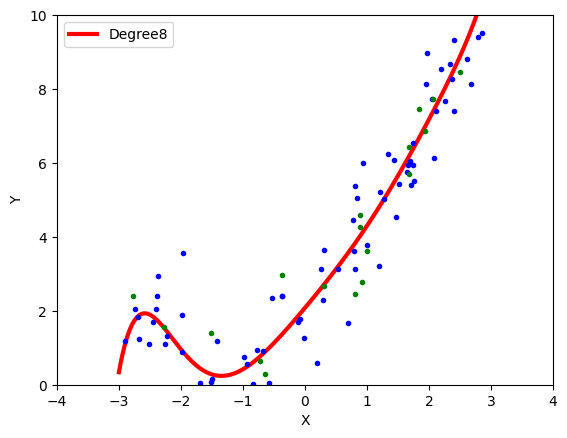

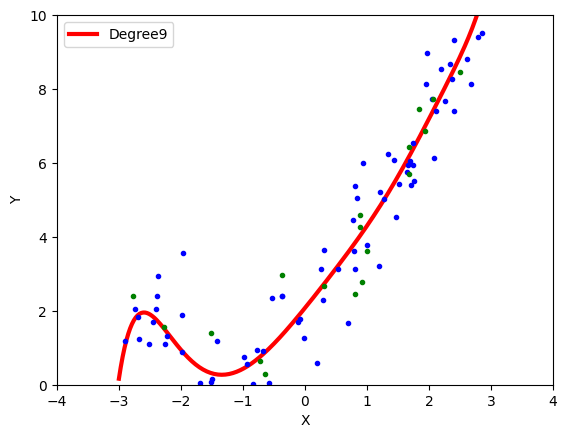

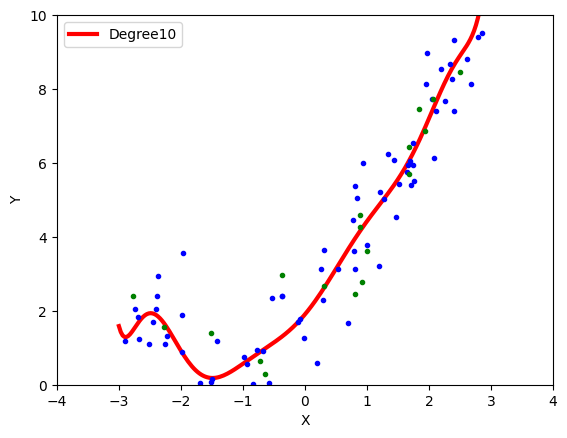

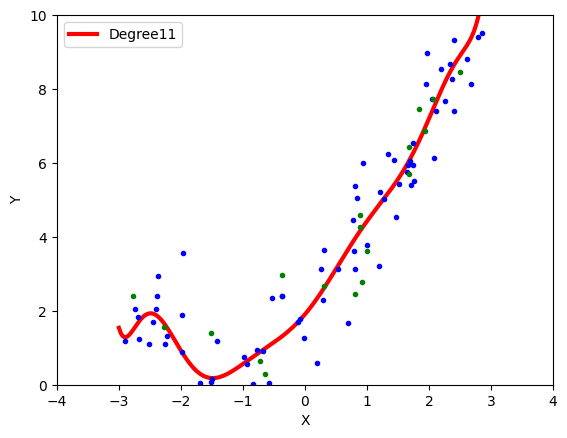

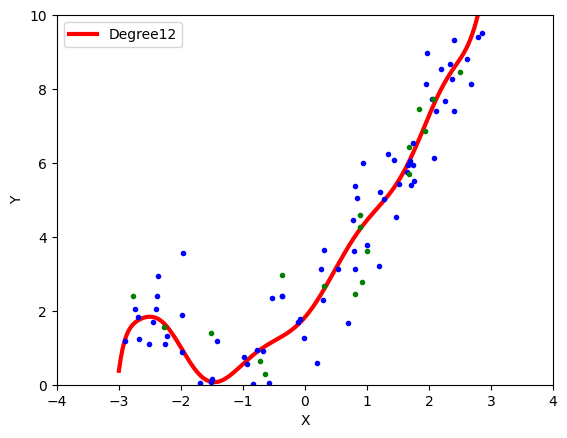

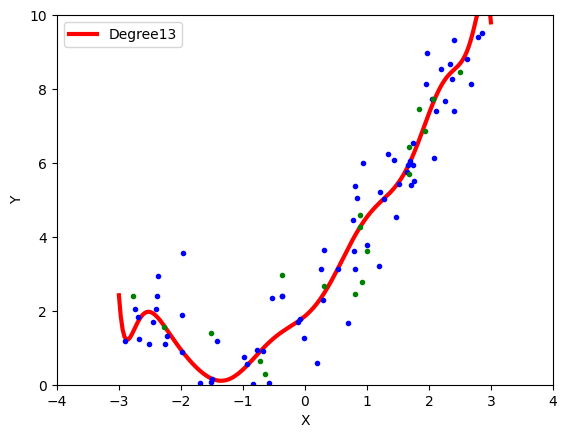

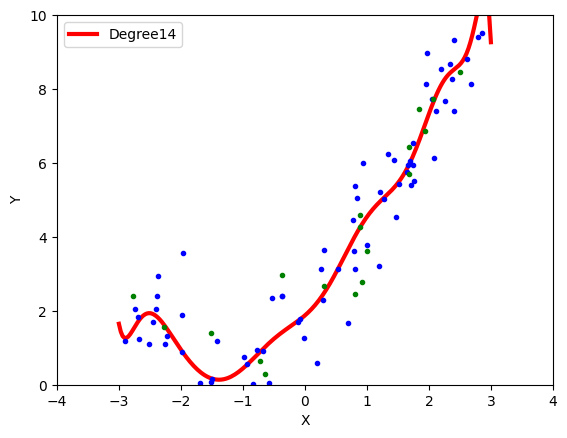

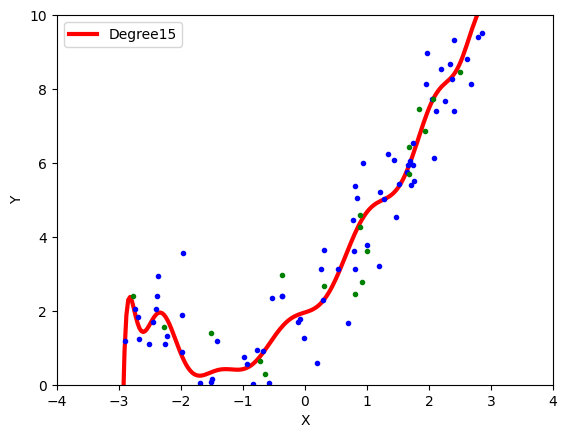

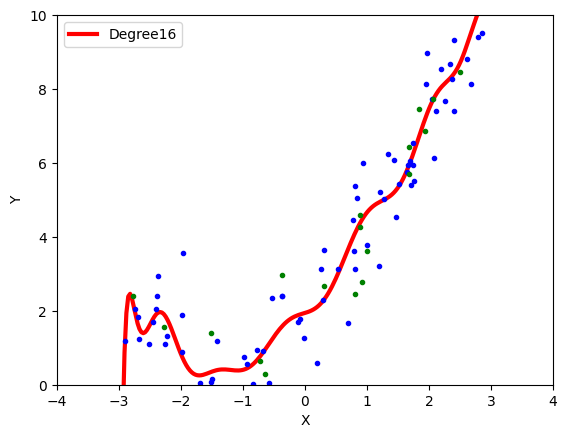

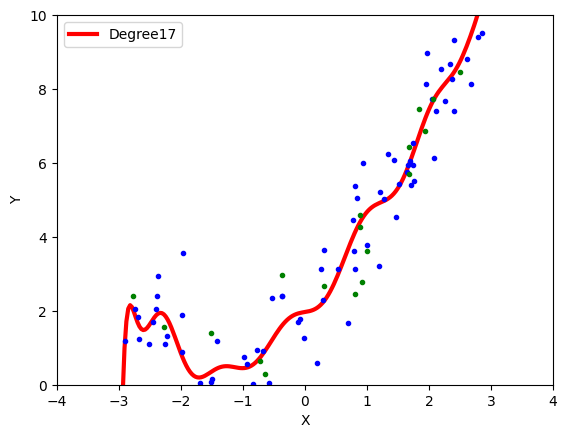

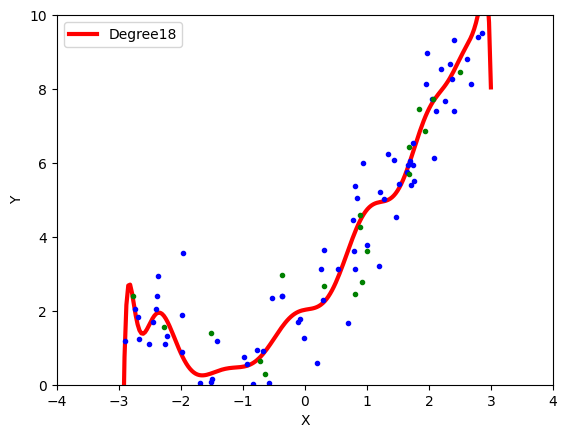

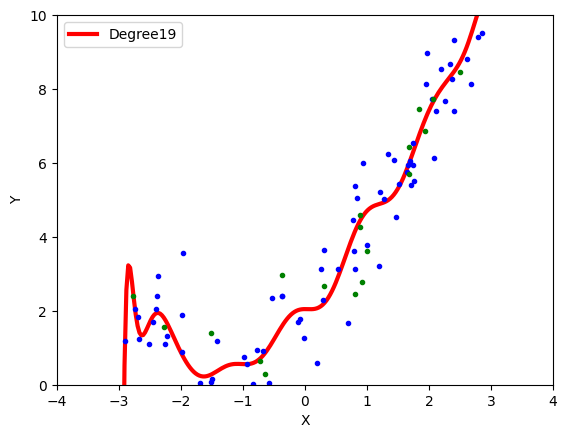

In [87]:
for i in range(20):
    poly_regression(i)